In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
appointments = pd.read_csv('D:/DataIncubator_ChestXray/appointment_show_no-show/KaggleV2-May-2016.csv')

In [41]:
appointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [42]:
appointments.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [43]:
appointments['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [6]:
print('Percentage of no-show cases {}'.format(appointments['No-show'].value_counts()[1]/appointments.shape[0]))
print('Percentage of show cases {}'.format(appointments['No-show'].value_counts()[0]/appointments.shape[0]))

Percentage of no-show cases 0.20193255946510807
Percentage of show cases 0.798067440534892


In [7]:
appointments.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [8]:
appointments.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
appointments.describe(include='all')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,3.921784e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.172614e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.173184e+13,5.680573e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,9.439172e+13,5.725524e+06,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


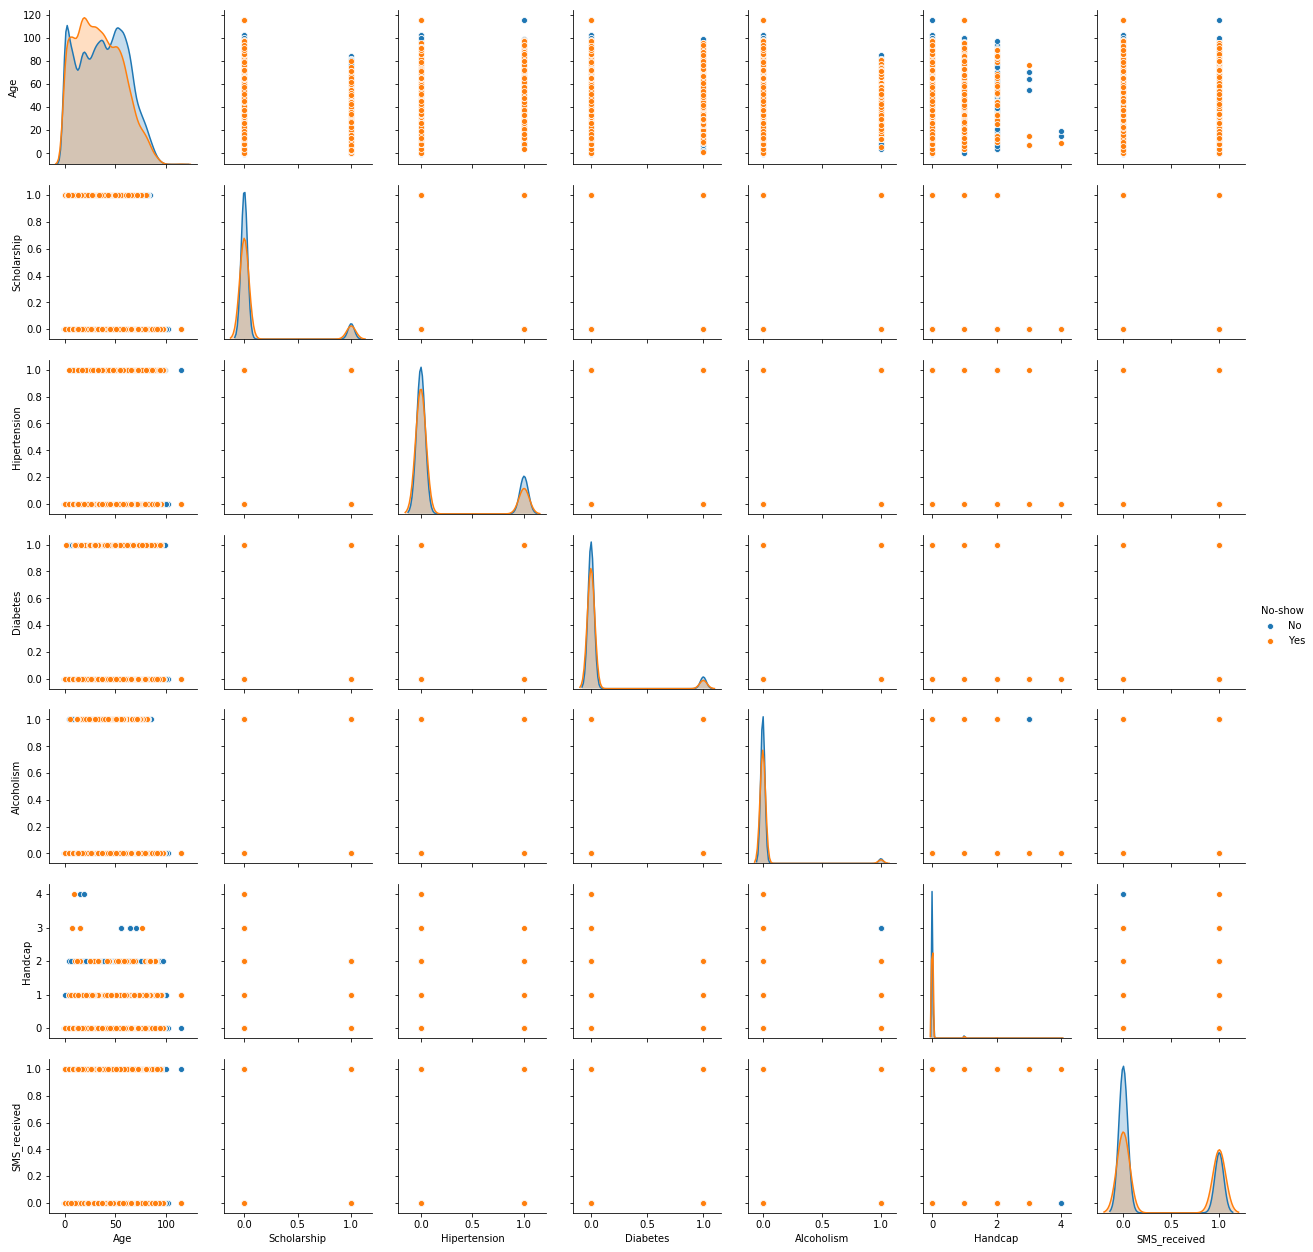

In [11]:
sns.pairplot(appointments.iloc[:, 2:], hue='No-show', diag_kind='kde')

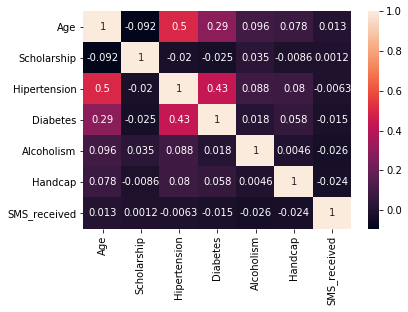

In [12]:
corr = appointments.iloc[:, 2:].corr()
sns.heatmap(corr, annot=True)

In [13]:
appointments.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [14]:
cat = ['Gender', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']

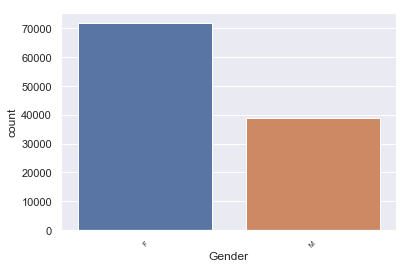

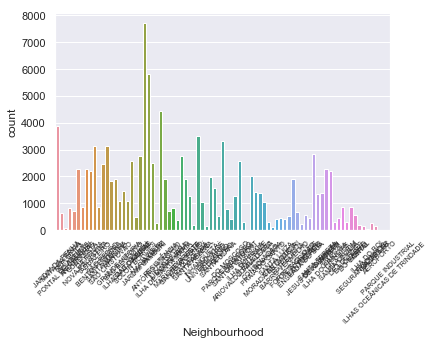

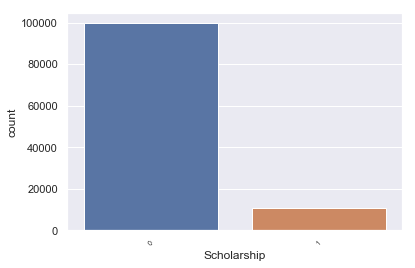

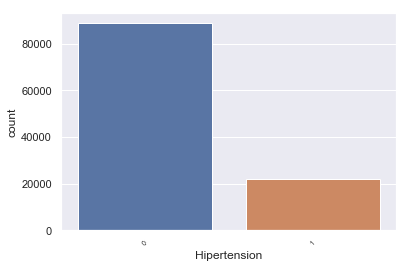

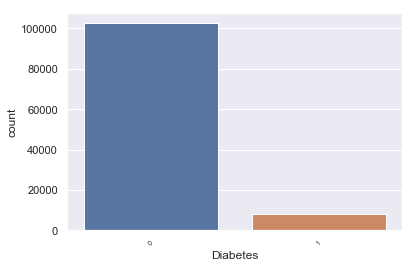

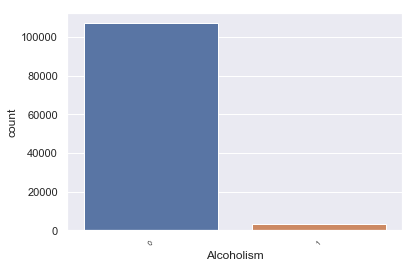

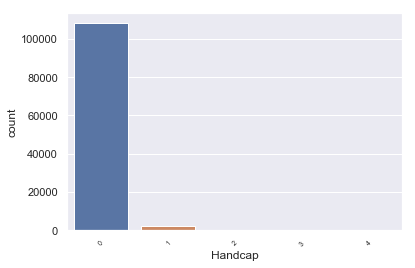

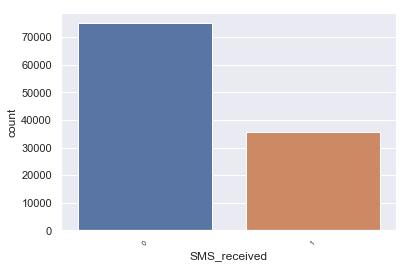

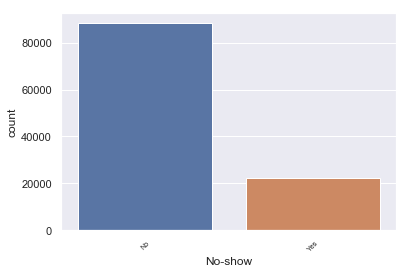

In [15]:
font_dict = {'fontsize': '7'}
sns.set()
for c in cat:
    g = sns.countplot(x=c, data=appointments)
    _, labels = plt.xticks()
    g.set_xticklabels(labels, rotation=45, fontdict=font_dict)
    plt.show()

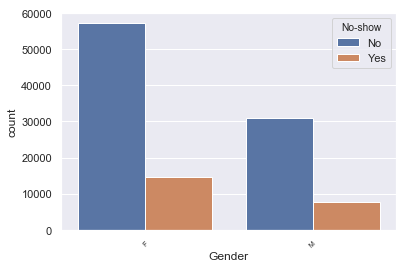

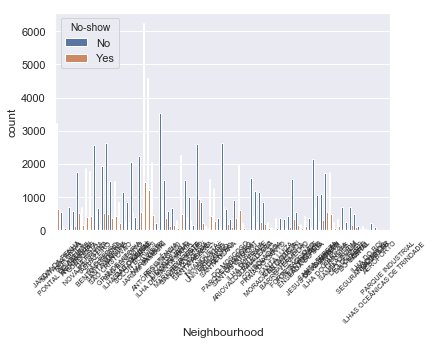

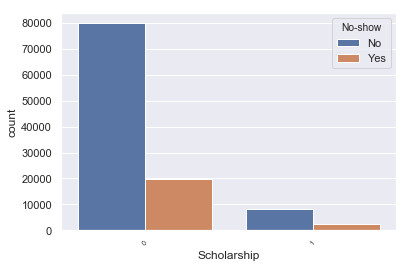

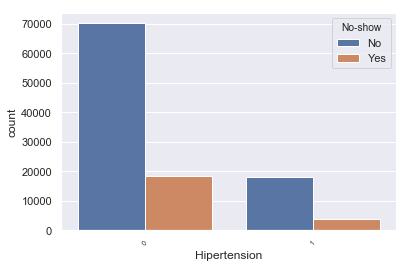

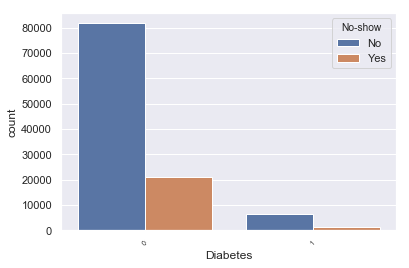

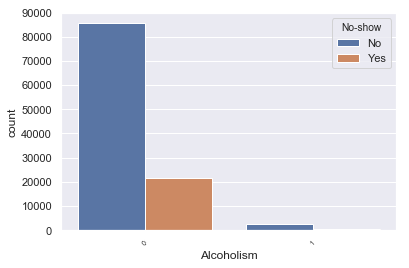

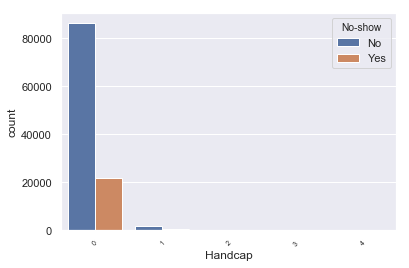

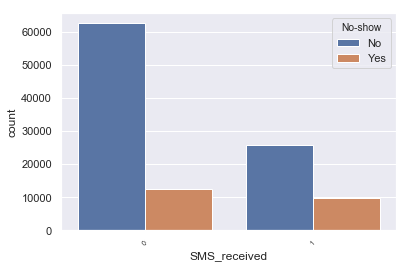

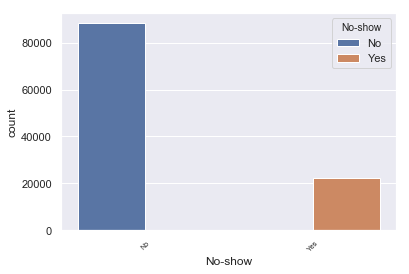

In [13]:
font_dict = {'fontsize': '7'}
sns.set()
for c in cat:
    g = sns.countplot(x=c, hue = 'No-show', data=appointments)
    _, labels = plt.xticks()
    g.set_xticklabels(labels, rotation=45, fontdict=font_dict)
    plt.show()

In [28]:
def percent_groupby(column, label, data, overall_percent):
    df = data.groupby([column, label]).size().reset_index()
    df.columns = [column, label, "count"]
    k = pd.pivot_table(df, index=column, columns=label, values="count")
    k["ns_No_percent"] = k["No"] / (k["No"] + k["Yes"])
    k["ns_Yes_percent"] = k["Yes"] / (k["No"] + k["Yes"])
    k["Yes_greator_than_overall"] = (k["ns_Yes_percent"] > overall_percent).apply(lambda x: "yes" if x == True else "no")
    return k, k[k["Yes_greator_than_overall"] == "yes"]

In [29]:
cat_forGroupby = ['Gender', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']

In [30]:
for col in cat_forGroupby:
    col, col_moreYes = percent_groupby(col, "No-show", appointments, 0.20193)
    print("overall destribution per class  \n {} \n distribution for cases where No-show = yes is more than average  \n {} \n".format(col, col_moreYes))
    print("\n")

overall destribution per class  
 No-show     No    Yes  ns_No_percent  ns_Yes_percent Yes_greator_than_overall
Gender                                                                       
F        57246  14594       0.796854        0.203146                      yes
M        30962   7725       0.800321        0.199679                       no 
 distribution for cases where No-show = yes is more than average  
 No-show     No    Yes  ns_No_percent  ns_Yes_percent Yes_greator_than_overall
Gender                                                                       
F        57246  14594       0.796854        0.203146                      yes 



overall destribution per class  
 No-show                  No    Yes  ns_No_percent  ns_Yes_percent  \
Neighbourhood                                                       
AEROPORTO               7.0    1.0       0.875000        0.125000   
ANDORINHAS           1741.0  521.0       0.769673        0.230327   
ANTÔNIO HONÓRIO       221.0   50.0   

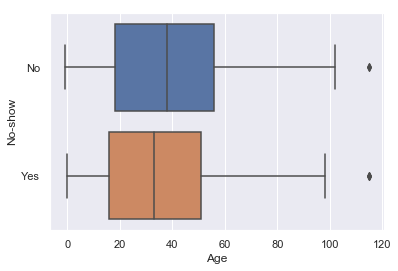

In [31]:
sns.boxplot('Age', 'No-show', data=appointments)
plt.show()

In [32]:
appointments.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [44]:
appointments['ScheduledDay_date'] = pd.to_datetime(appointments['ScheduledDay'], format='%Y-%m-%dT%H:%M:%SZ')
appointments['AppointmentDay_date'] = pd.to_datetime(appointments['AppointmentDay'], format='%Y-%m-%dT%H:%M:%SZ')

In [45]:
appointments.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDay_date,AppointmentDay_date
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29 18:38:08,2016-04-29
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29 16:08:27,2016-04-29
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29 16:19:04,2016-04-29
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29 17:29:31,2016-04-29
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29 16:07:23,2016-04-29


In [46]:
def datetime_features(data, datetime, prefix):
    data[prefix + '_Day_of_week'] = data[datetime].apply(lambda x: x.strftime('%A'))
    data[prefix + '_hour'] = data[datetime].apply(lambda x: x.strftime('%H'))
    data[prefix + '_minute'] = data[datetime].apply(lambda x: x.strftime('%M'))
    data[prefix + '_Month_of_year'] = data[datetime].apply(lambda x: x.strftime('%B'))
    data[prefix + '_Day_of_month'] = data[datetime].apply(lambda x: x.strftime('%d'))
    data[prefix + '_year'] = data[datetime].apply(lambda x: x.strftime('%Y'))

In [47]:
datetime_features(appointments, 'ScheduledDay_date', "Scheduled" )
datetime_features(appointments, 'AppointmentDay_date', "Appointment" )

In [48]:
appointments.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,Scheduled_minute,Scheduled_Month_of_year,Scheduled_Day_of_month,Scheduled_year,Appointment_Day_of_week,Appointment_hour,Appointment_minute,Appointment_Month_of_year,Appointment_Day_of_month,Appointment_year
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,...,38,April,29,2016,Friday,00,00,April,29,2016
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,...,08,April,29,2016,Friday,00,00,April,29,2016
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,...,19,April,29,2016,Friday,00,00,April,29,2016
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,...,29,April,29,2016,Friday,00,00,April,29,2016
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,...,07,April,29,2016,Friday,00,00,April,29,2016


In [49]:
appointments.describe(include='all')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,Scheduled_minute,Scheduled_Month_of_year,Scheduled_Day_of_month,Scheduled_year,Appointment_Day_of_week,Appointment_hour,Appointment_minute,Appointment_Month_of_year,Appointment_Day_of_month,Appointment_year
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,...,110527,110527,110527,110527,110527,110527,110527,110527,110527,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,...,60,8,31,2,6,1,1,3,24,1
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,...,06,May,02,2016,Wednesday,00,00,May,02,2016
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,...,2052,67421,7160,110465,25867,110527,110527,80841,8686,110527
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.921784e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4.172614e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
appointments.drop(columns=["Appointment_hour", "Appointment_minute"], inplace=True)

In [52]:
appointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 26 columns):
PatientId                    110527 non-null float64
AppointmentID                110527 non-null int64
Gender                       110527 non-null object
ScheduledDay                 110527 non-null object
AppointmentDay               110527 non-null object
Age                          110527 non-null int64
Neighbourhood                110527 non-null object
Scholarship                  110527 non-null int64
Hipertension                 110527 non-null int64
Diabetes                     110527 non-null int64
Alcoholism                   110527 non-null int64
Handcap                      110527 non-null int64
SMS_received                 110527 non-null int64
No-show                      110527 non-null object
ScheduledDay_date            110527 non-null datetime64[ns]
AppointmentDay_date          110527 non-null datetime64[ns]
Scheduled_Day_of_week        110527 non-null obj

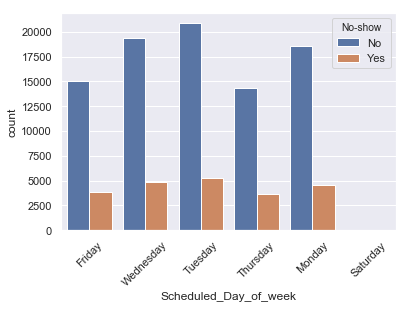

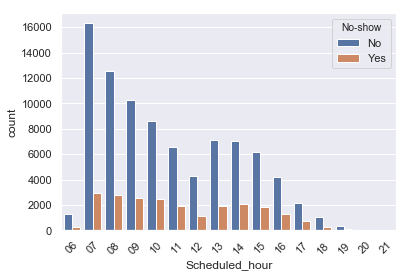

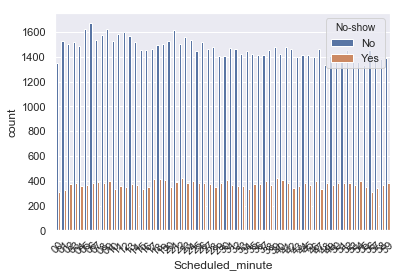

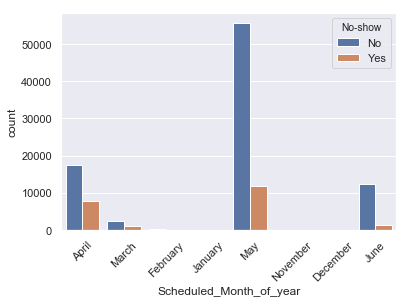

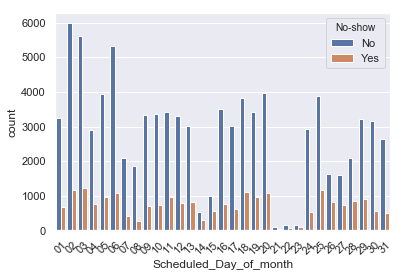

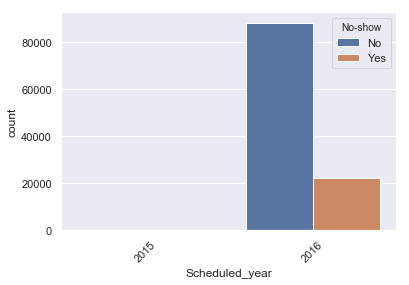

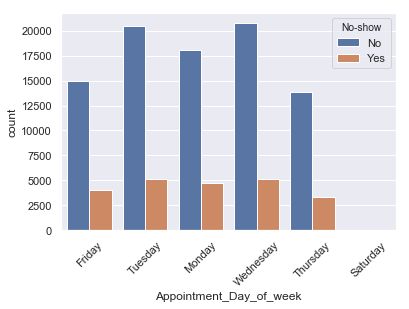

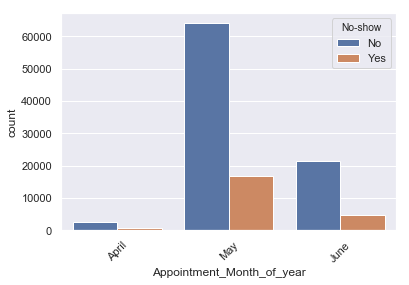

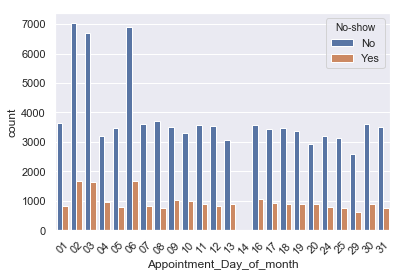

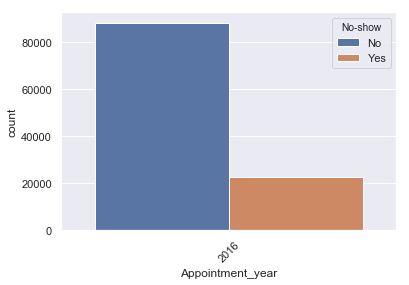

In [53]:
col = ['Scheduled_Day_of_week', 'Scheduled_hour', 'Scheduled_minute', 'Scheduled_Month_of_year', 'Scheduled_Day_of_month', 
       'Scheduled_year', 'Appointment_Day_of_week','Appointment_Month_of_year', 'Appointment_Day_of_month', 
       'Appointment_year']

for c in col:
    g = sns.countplot(x=c, hue='No-show', data=appointments)
    _, label = plt.xticks()
    g.set_xticklabels(label, rotation=45)
#     plt.xlabel(c)
    plt.show()

In [55]:
appointments['WeekdayScheduled'] = appointments.apply(lambda x: x.ScheduledDay_date.isoweekday(), axis = 1)
appointments['WeekdayAppointment'] = appointments.apply(lambda x: x.AppointmentDay_date.isoweekday(), axis = 1)

In [56]:
appointments['DaysBeforeApp'] = ((appointments.AppointmentDay_date - appointments.ScheduledDay_date).astype('timedelta64[D]')).astype(int)

In [91]:
def DaysBeforeCat(days):
    if days == 0:
        return '0 days'
    elif days in range(1,3):
        return '1-2 days'
    elif days in range(3,8):
        return '3-7 days'
    elif days in range(8, 21):
        return '8-20 days'
    elif days in range(8, 21):
        return '8-20 days'
    elif days in range(21, 31):
        return '20-30 days'
    elif days in range(31, 46):
        return '30-45 days'
    else:
        return '> 45 days'

In [92]:
appointments['DaysBeforeAppCat'] = appointments.DaysBeforeApp.apply(DaysBeforeCat)

In [59]:
appointments.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,Scheduled_Day_of_month,Scheduled_year,Appointment_Day_of_week,Appointment_Month_of_year,Appointment_Day_of_month,Appointment_year,WeekdayScheduled,WeekdayAppointment,DaysBeforeApp,DaysBeforeAppCat
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,...,29,2016,Friday,April,29,2016,5,5,-1,> 31 days
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,...,29,2016,Friday,April,29,2016,5,5,-1,> 31 days
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,...,29,2016,Friday,April,29,2016,5,5,-1,> 31 days
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,...,29,2016,Friday,April,29,2016,5,5,-1,> 31 days
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,...,29,2016,Friday,April,29,2016,5,5,-1,> 31 days


In [60]:
appointments.describe(include='all')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,Scheduled_Day_of_month,Scheduled_year,Appointment_Day_of_week,Appointment_Month_of_year,Appointment_Day_of_month,Appointment_year,WeekdayScheduled,WeekdayAppointment,DaysBeforeApp,DaysBeforeAppCat
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,...,110527,110527,110527,110527,110527,110527,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,...,31,2,6,3,24,1,NaN,NaN,NaN,5
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,...,02,2016,Wednesday,May,02,2016,NaN,NaN,NaN,> 31 days
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,...,7160,110465,25867,80841,8686,110527,NaN,NaN,NaN,47688
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,...,NaN,NaN,NaN,NaN,NaN,NaN,2.851955,2.858243,9.183702,NaN
std,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,...,NaN,NaN,NaN,NaN,NaN,NaN,1.378520,1.371672,15.254996,NaN
min,3.921784e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,-7.000000,NaN
25%,4.172614e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,-1.000000,NaN


In [63]:
appointments.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'ScheduledDay_date', 'AppointmentDay_date', 'Scheduled_Day_of_week',
       'Scheduled_hour', 'Scheduled_minute', 'Scheduled_Month_of_year',
       'Scheduled_Day_of_month', 'Scheduled_year', 'Appointment_Day_of_week',
       'Appointment_Month_of_year', 'Appointment_Day_of_month',
       'Appointment_year', 'WeekdayScheduled', 'WeekdayAppointment',
       'DaysBeforeApp', 'DaysBeforeAppCat'],
      dtype='object')

In [66]:
cat_forGroupby2 = ['Scheduled_Day_of_week',
       'Scheduled_hour', 'Scheduled_minute', 'Scheduled_Month_of_year',
       'Scheduled_Day_of_month', 'Scheduled_year', 'Appointment_Day_of_week',
       'Appointment_Month_of_year', 'Appointment_Day_of_month',
       'Appointment_year', 'WeekdayScheduled', 'WeekdayAppointment', 'DaysBeforeAppCat']

In [67]:
for col in cat_forGroupby2:
    col, col_moreYes = percent_groupby(col, "No-show", appointments, 0.20193)
    print("overall destribution per class  \n {} \n distribution for cases where No-show = yes is more than average  \n {} \n".format(col, col_moreYes))
    print("\n")

overall destribution per class  
 No-show                   No   Yes  ns_No_percent  ns_Yes_percent  \
Scheduled_Day_of_week                                               
Friday                 15028  3887       0.794502        0.205498   
Monday                 18524  4561       0.802426        0.197574   
Saturday                  23     1       0.958333        0.041667   
Thursday               14373  3700       0.795275        0.204725   
Tuesday                20877  5291       0.797806        0.202194   
Wednesday              19383  4879       0.798904        0.201096   

No-show               Yes_greator_than_overall  
Scheduled_Day_of_week                           
Friday                                     yes  
Monday                                      no  
Saturday                                    no  
Thursday                                   yes  
Tuesday                                    yes  
Wednesday                                   no   
 distribution for ca

overall destribution per class  
 No-show                     No   Yes  ns_No_percent  ns_Yes_percent  \
Appointment_Day_of_month                                              
01                        3652   812       0.818100        0.181900   
02                        7023  1663       0.808542        0.191458   
03                        6710  1636       0.803978        0.196022   
04                        3195   973       0.766555        0.233445   
05                        3466   807       0.811140        0.188860   
06                        6903  1668       0.805390        0.194610   
07                        3600   816       0.815217        0.184783   
08                        3705   774       0.827194        0.172806   
09                        3501  1019       0.774558        0.225442   
10                        3316   992       0.769731        0.230269   
11                        3589   885       0.802190        0.197810   
12                        3557   837       

In [82]:
def barplot_sns(data):
    g = sns.barplot(x=data.index, y = data.ns_Yes_percent)
    _, label = plt.xticks()
    g.set_xticklabels(label, rotation=45)
    plt.show()

In [83]:
def percent_groupbyPlot(column, label, data):
    df = data.groupby([column, label]).size().reset_index()
    df.columns = [column, label, "count"]
    k = pd.pivot_table(df, index=column, columns=label, values="count")
    k["ns_No_percent"] = k["No"] / (k["No"] + k["Yes"])
    k["ns_Yes_percent"] = k["Yes"] / (k["No"] + k["Yes"])
    barplot_sns(k)

In [84]:
appointments.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'ScheduledDay_date', 'AppointmentDay_date', 'Scheduled_Day_of_week',
       'Scheduled_hour', 'Scheduled_minute', 'Scheduled_Month_of_year',
       'Scheduled_Day_of_month', 'Scheduled_year', 'Appointment_Day_of_week',
       'Appointment_Month_of_year', 'Appointment_Day_of_month',
       'Appointment_year', 'WeekdayScheduled', 'WeekdayAppointment',
       'DaysBeforeApp', 'DaysBeforeAppCat'],
      dtype='object')

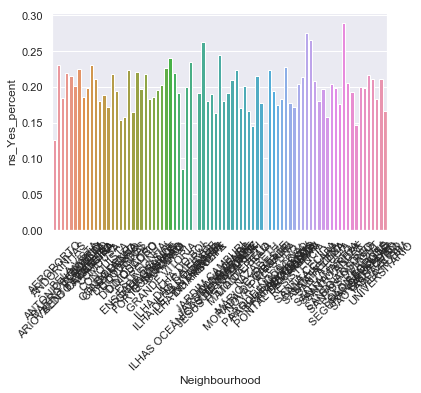

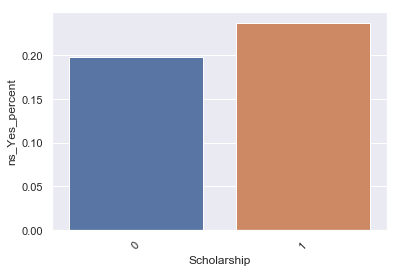

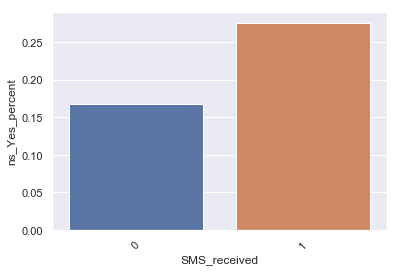

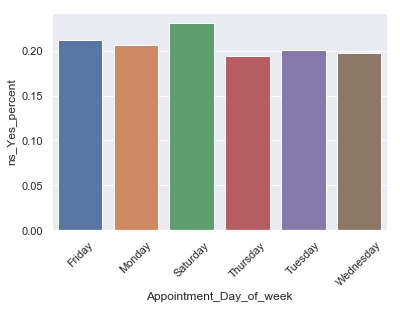

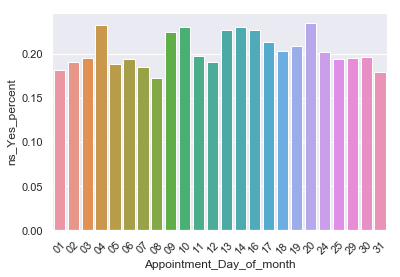

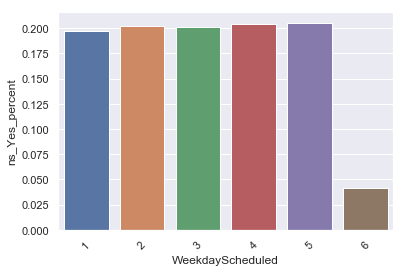

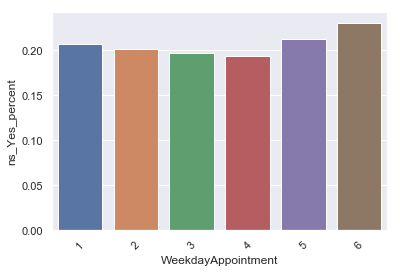

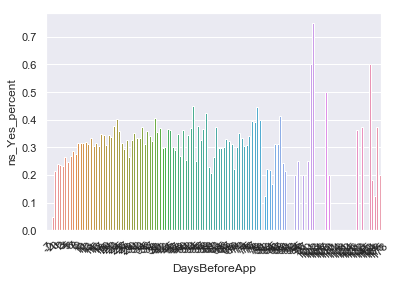

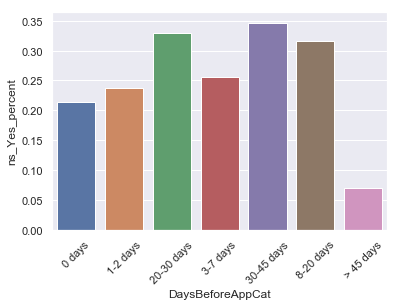

In [93]:
insights_col = ['Neighbourhood', 'Scholarship', 'SMS_received', 'Appointment_Day_of_week', 'Appointment_Day_of_month',
               'WeekdayScheduled', 'WeekdayAppointment', 'DaysBeforeApp', 'DaysBeforeAppCat']

for col in insights_col:
    percent_groupbyPlot(col, 'No-show', appointments)

In [88]:
df = appointments.groupby(["DaysBeforeApp", "No-show"]).size().reset_index()
df.columns = ['DaysBeforeApp', 'No-show', 'count']
k = pd.pivot_table(df, index='DaysBeforeApp', columns='No-show', values="count")
k["ns_No_percent"] = k["No"] / (k["No"] + k["Yes"])
k["ns_Yes_percent"] = k["Yes"] / (k["No"] + k["Yes"])
k

No-show,No,Yes,ns_No_percent,ns_Yes_percent
DaysBeforeApp,,,,
-7,NaN,1.0,NaN,NaN
-2,NaN,4.0,NaN,NaN
-1,36771.0,1792.0,0.953531,0.046469
0,4100.0,1113.0,0.786495,0.213505
1,5123.0,1602.0,0.761784,0.238216
2,2093.0,644.0,0.764706,0.235294
3,4059.0,1231.0,0.767297,0.232703
4,2405.0,872.0,0.733903,0.266097
5,3036.0,1001.0,0.752044,0.247956


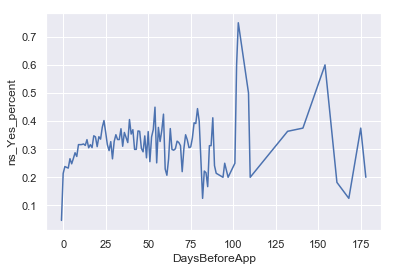

In [89]:
sns.lineplot(x=k.index, y=k.ns_Yes_percent)

In [97]:
df = appointments.groupby(["DaysBeforeAppCat", "No-show"]).size().reset_index()
df.columns = ['DaysBeforeAppCat', 'No-show', 'count']
k = pd.pivot_table(df, index='DaysBeforeAppCat', columns='No-show', values="count")
k["ns_No_percent"] = k["No"] / (k["No"] + k["Yes"])
k["ns_Yes_percent"] = k["Yes"] / (k["No"] + k["Yes"])
k

No-show,No,Yes,ns_No_percent,ns_Yes_percent
DaysBeforeAppCat,,,,
0 days,4100,1113,0.786495,0.213505
1-2 days,7216,2246,0.762629,0.237371
20-30 days,6149,3020,0.670629,0.329371
3-7 days,14759,5083,0.743826,0.256174
30-45 days,3889,2065,0.653174,0.346826
8-20 days,12712,5855,0.684656,0.315344
> 45 days,39383,2937,0.930600,0.069400


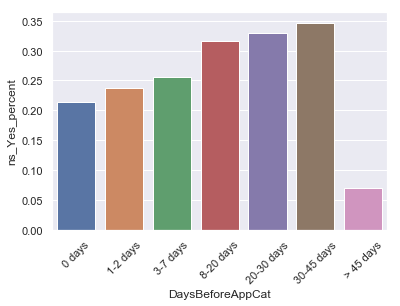

In [96]:
g = sns.barplot(x=k.index, y=k.ns_Yes_percent, order = ['0 days', '1-2 days', '3-7 days', '8-20 days', '20-30 days', '30-45 days', '> 45 days'])
_, label = plt.xticks()
g.set_xticklabels(label, rotation=45)
plt.show()

From Univariate analysis, we conclude that:
1 - There is above average no-show(no-show == yes) behavor in some neighbourhoods
2 - People who have received SMS are more likely to bunk
3 - People who have scholarship are more likely to bunk
4 - People bunk appointments on Monday and Friday
5 - The probability of bunking appointment increases with increase in wait time i.e. time between schedule and appointment


Univariate analysis is concluded, lets do bivariate analysis
1 - Lets check if there is any difference in age distribution 

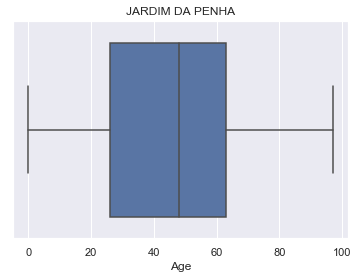

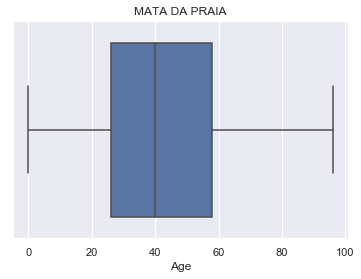

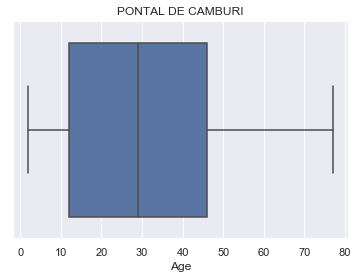

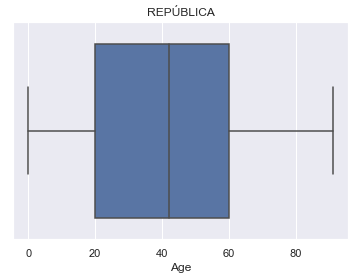

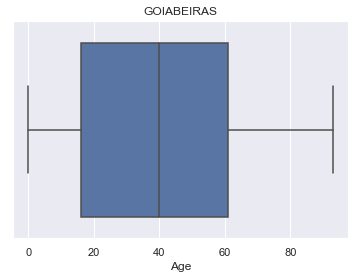

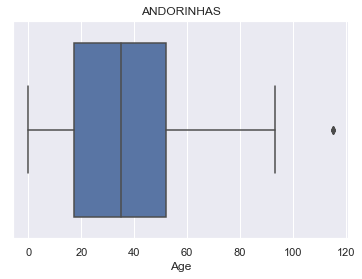

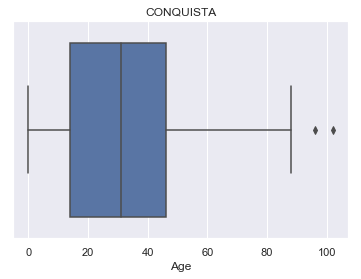

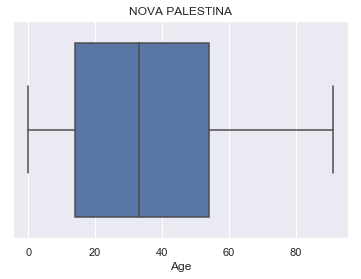

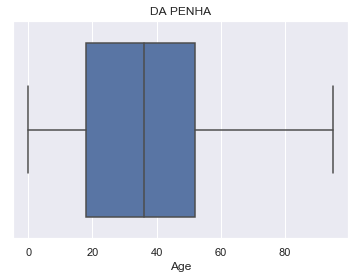

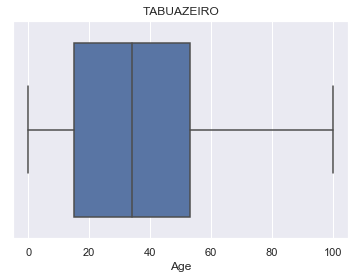

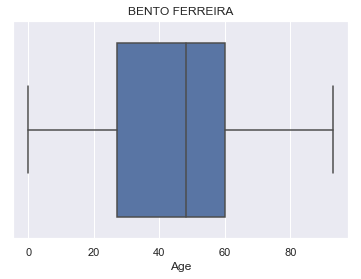

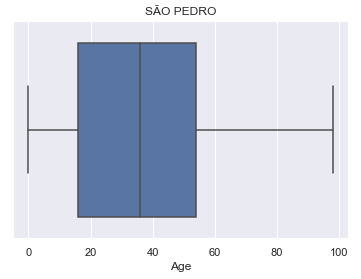

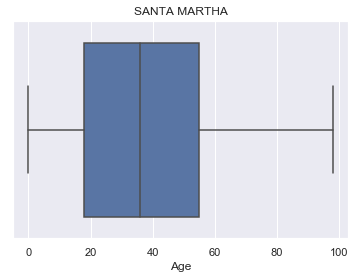

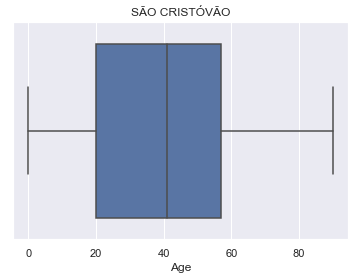

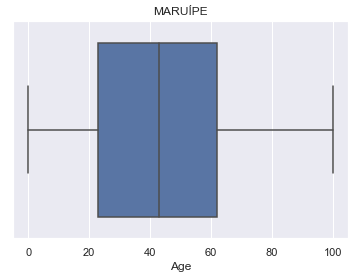

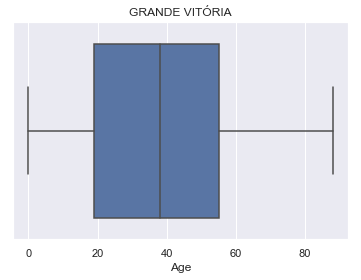

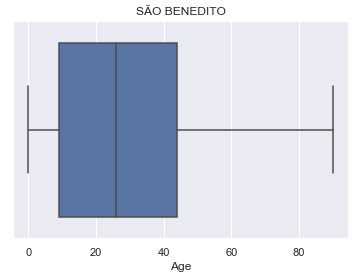

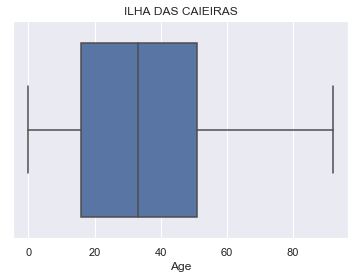

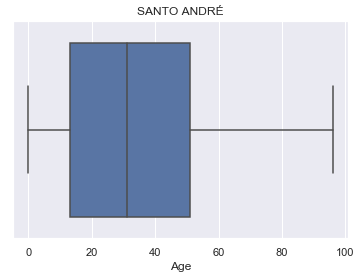

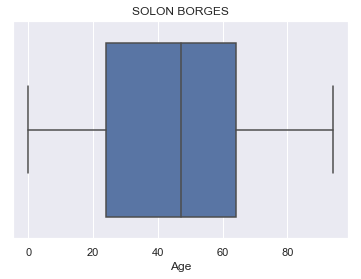

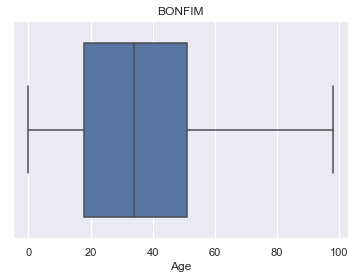

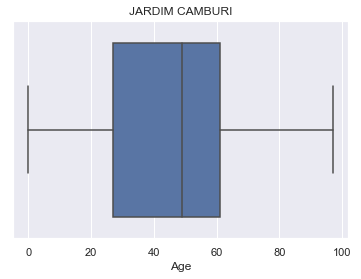

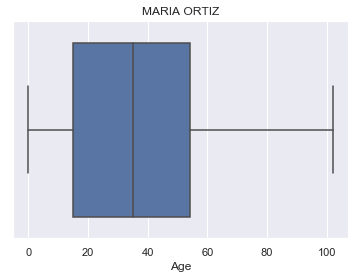

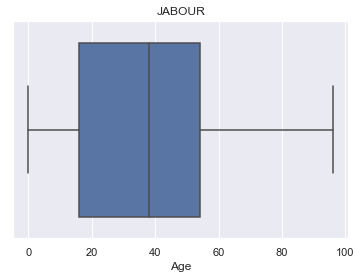

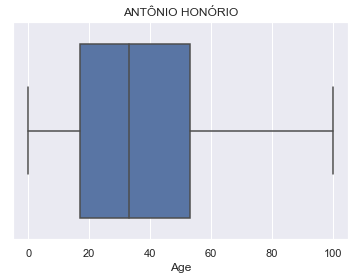

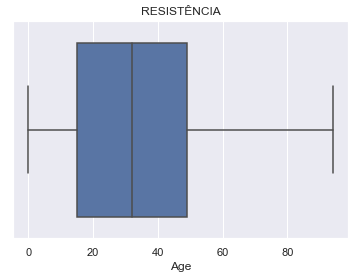

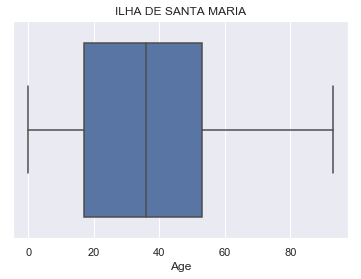

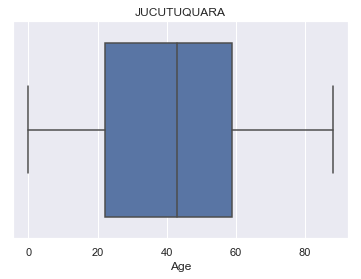

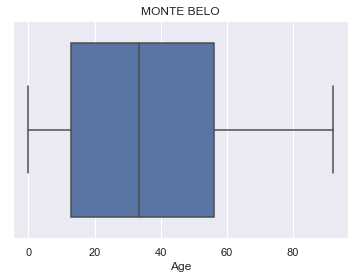

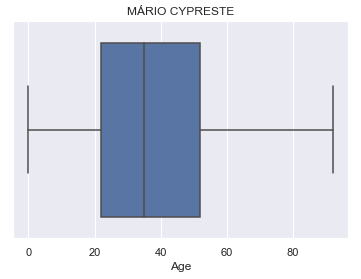

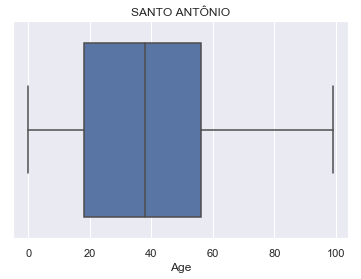

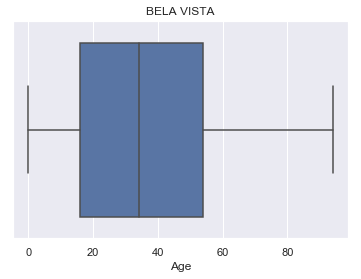

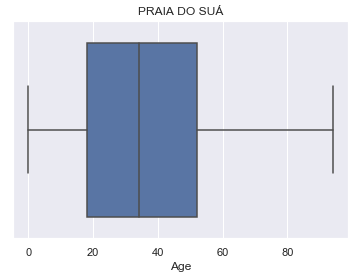

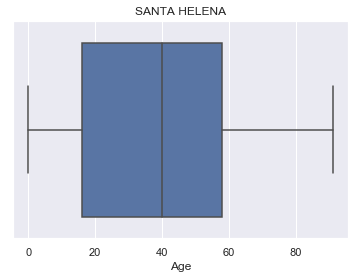

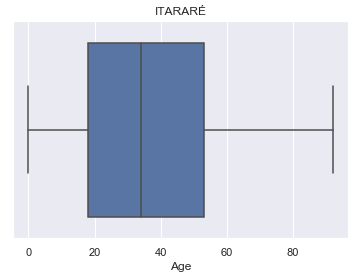

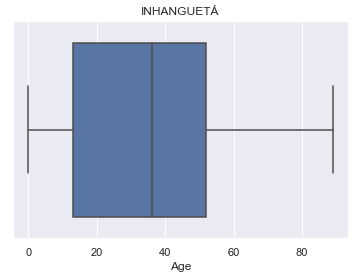

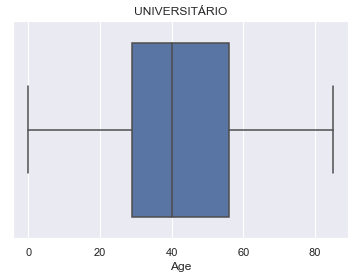

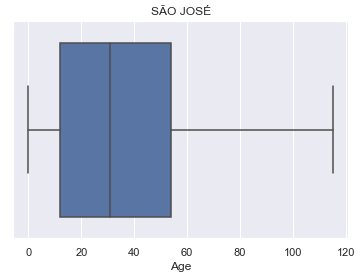

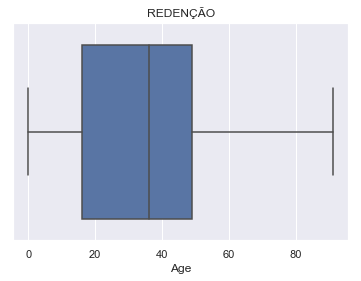

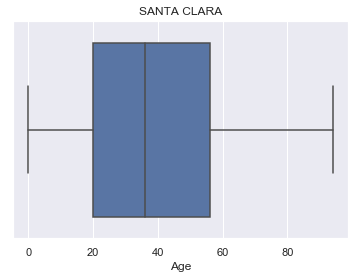

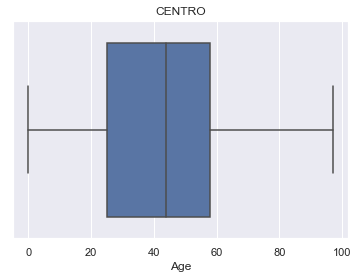

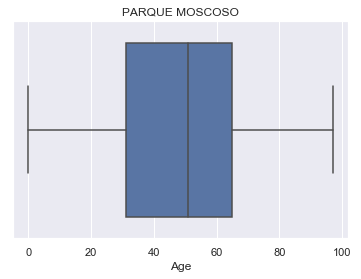

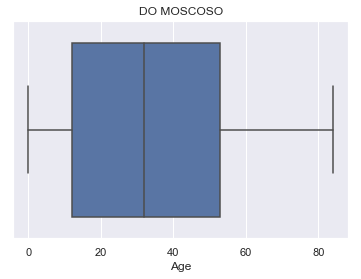

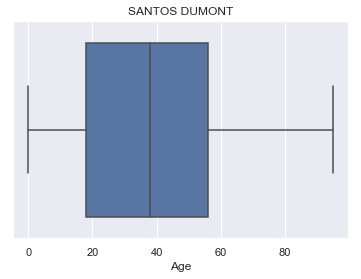

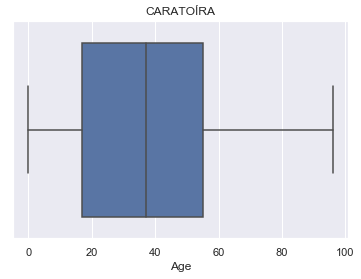

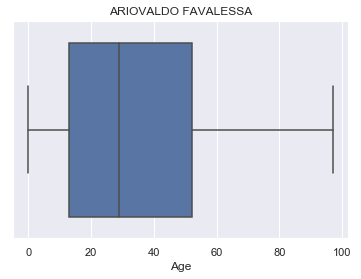

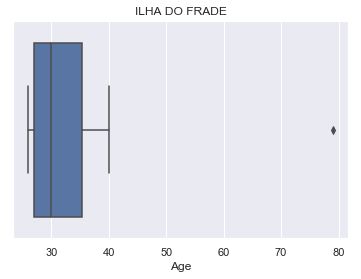

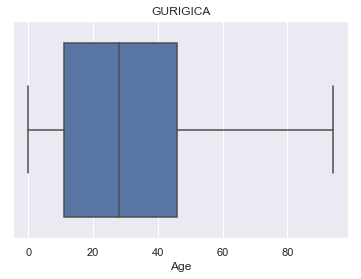

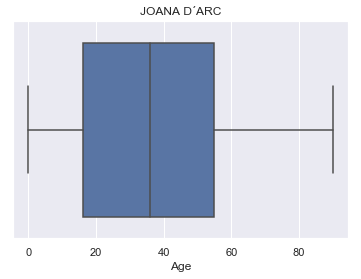

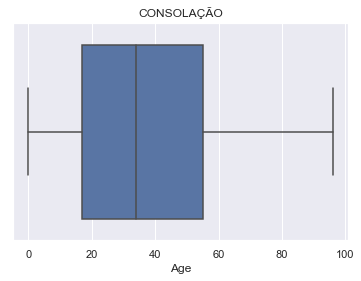

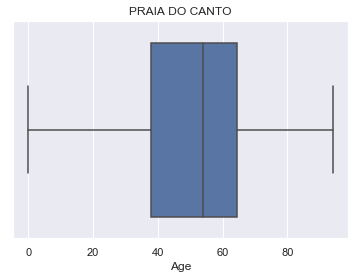

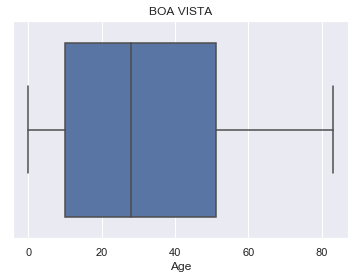

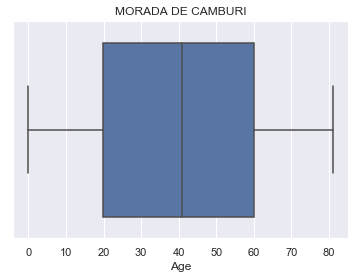

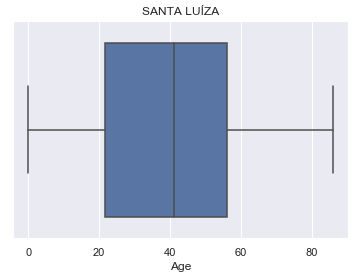

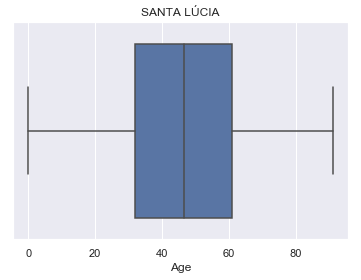

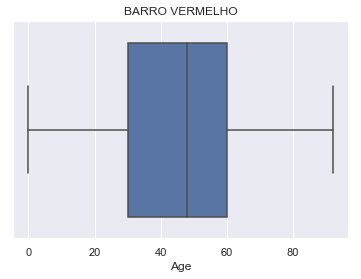

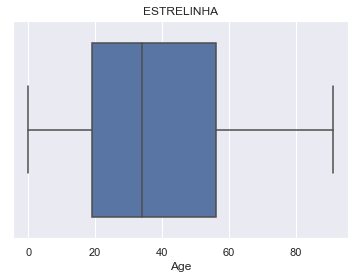

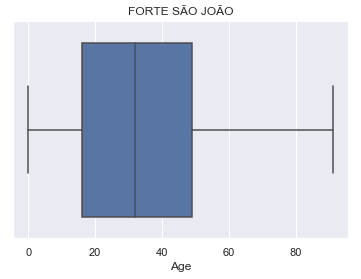

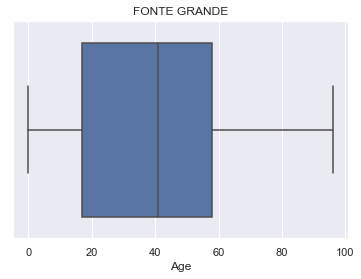

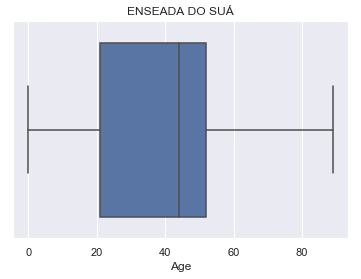

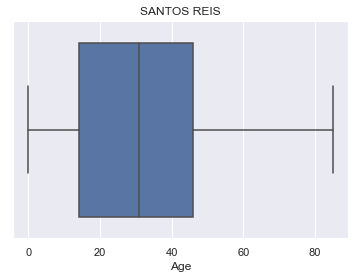

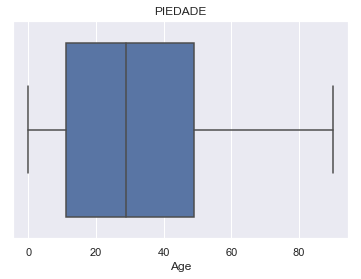

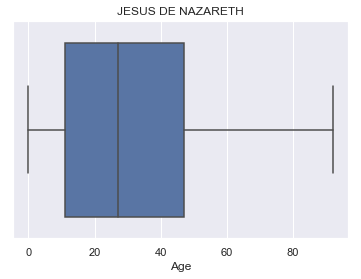

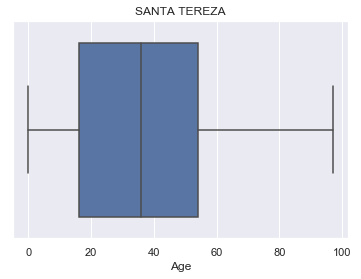

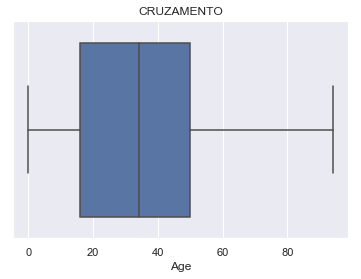

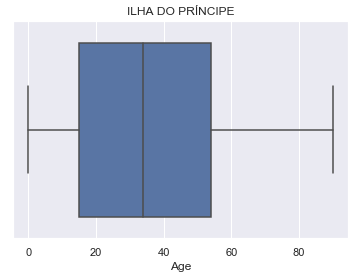

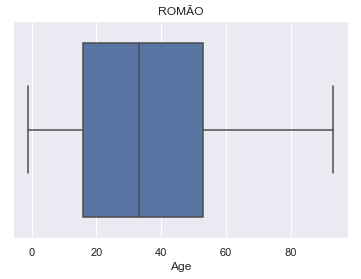

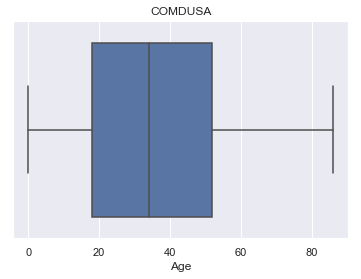

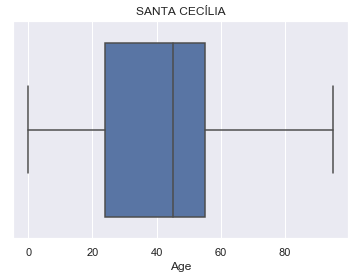

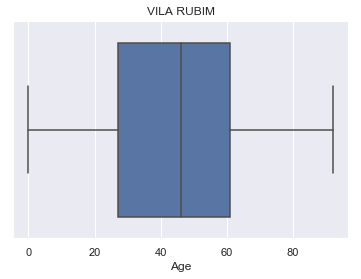

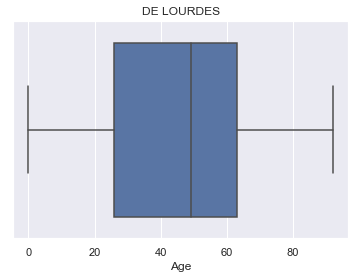

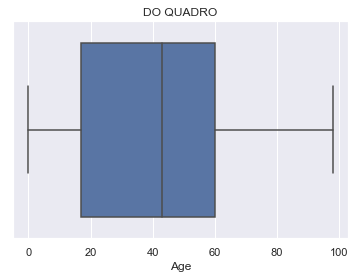

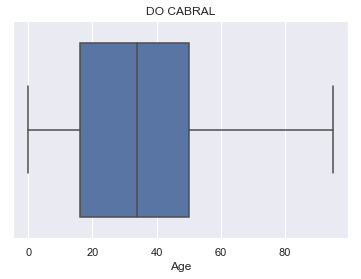

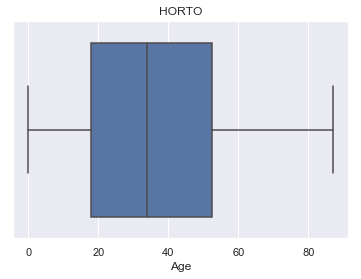

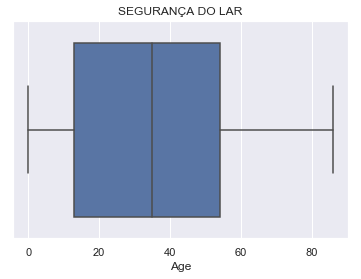

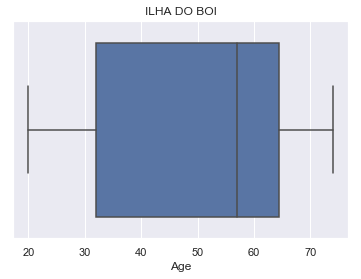

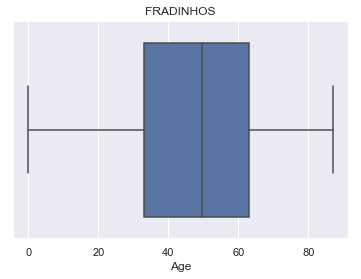

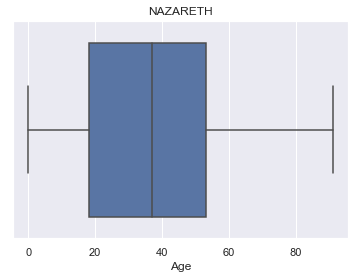

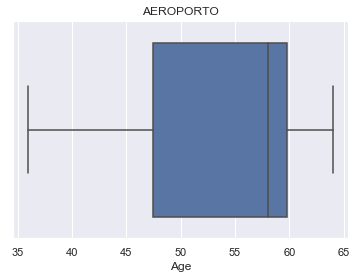

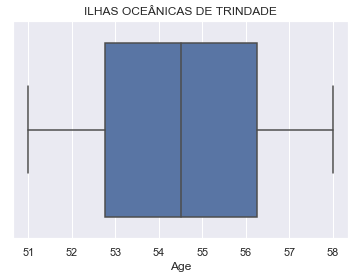

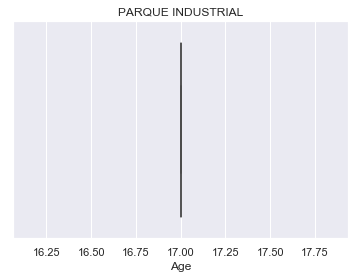

In [106]:
neig = list(appointments.Neighbourhood.unique())
for n in neig:
    g = sns.boxplot('Age', data=appointments.loc[appointments["Neighbourhood"]==n,])
    plt.title(n)
    plt.show()

In [173]:
df = appointments.groupby(['Neighbourhood', 'No-show']).size().reset_index()
df.columns = ['Neighbourhood', 'No-show', "count"]
k = pd.pivot_table(df, index='Neighbourhood', columns='No-show', values="count")
k["ns_No_percent"] = k["No"] / (k["No"] + k["Yes"])
k["ns_Yes_percent"] = k["Yes"] / (k["No"] + k["Yes"])
k["Yes_greator_than_overall"] = (k["ns_Yes_percent"] > 0.21).apply(lambda x: "yes" if x == True else "no")
k_fileterd =  k[k["Yes_greator_than_overall"] == "yes"]

In [175]:
k.index

Index(['AEROPORTO', 'ANDORINHAS', 'ANTÔNIO HONÓRIO', 'ARIOVALDO FAVALESSA',
       'BARRO VERMELHO', 'BELA VISTA', 'BENTO FERREIRA', 'BOA VISTA', 'BONFIM',
       'CARATOÍRA', 'CENTRO', 'COMDUSA', 'CONQUISTA', 'CONSOLAÇÃO',
       'CRUZAMENTO', 'DA PENHA', 'DE LOURDES', 'DO CABRAL', 'DO MOSCOSO',
       'DO QUADRO', 'ENSEADA DO SUÁ', 'ESTRELINHA', 'FONTE GRANDE',
       'FORTE SÃO JOÃO', 'FRADINHOS', 'GOIABEIRAS', 'GRANDE VITÓRIA',
       'GURIGICA', 'HORTO', 'ILHA DAS CAIEIRAS', 'ILHA DE SANTA MARIA',
       'ILHA DO BOI', 'ILHA DO FRADE', 'ILHA DO PRÍNCIPE',
       'ILHAS OCEÂNICAS DE TRINDADE', 'INHANGUETÁ', 'ITARARÉ', 'JABOUR',
       'JARDIM CAMBURI', 'JARDIM DA PENHA', 'JESUS DE NAZARETH', 'JOANA D´ARC',
       'JUCUTUQUARA', 'MARIA ORTIZ', 'MARUÍPE', 'MATA DA PRAIA', 'MONTE BELO',
       'MORADA DE CAMBURI', 'MÁRIO CYPRESTE', 'NAZARETH', 'NOVA PALESTINA',
       'PARQUE INDUSTRIAL', 'PARQUE MOSCOSO', 'PIEDADE', 'PONTAL DE CAMBURI',
       'PRAIA DO CANTO', 'PRAIA DO SUÁ', 'REDEN

probability of no-show = yes Neighbourhood
ANDORINHAS    0.230327
Name: ns_Yes_percent, dtype: float64


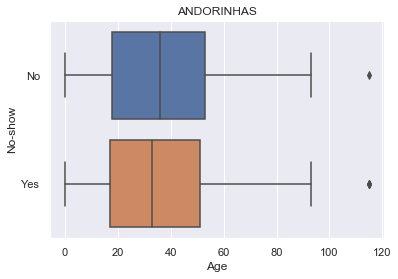

probability of no-show = yes Neighbourhood
ARIOVALDO FAVALESSA    0.219858
Name: ns_Yes_percent, dtype: float64


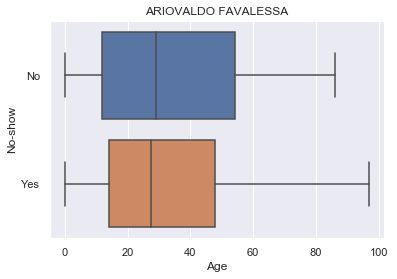

probability of no-show = yes Neighbourhood
BARRO VERMELHO    0.21513
Name: ns_Yes_percent, dtype: float64


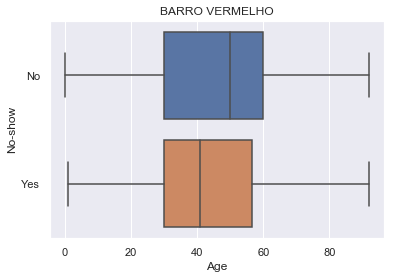

probability of no-show = yes Neighbourhood
BENTO FERREIRA    0.224942
Name: ns_Yes_percent, dtype: float64


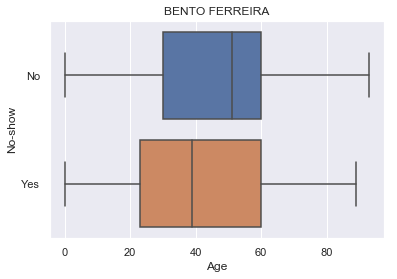

probability of no-show = yes Neighbourhood
CARATOÍRA    0.230409
Name: ns_Yes_percent, dtype: float64


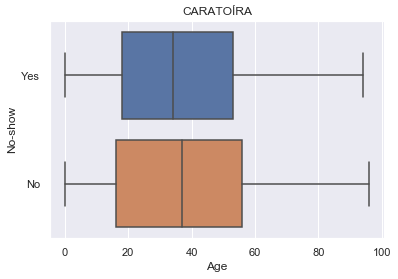

probability of no-show = yes Neighbourhood
CENTRO    0.210858
Name: ns_Yes_percent, dtype: float64


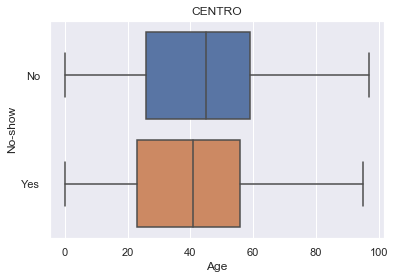

probability of no-show = yes Neighbourhood
CRUZAMENTO    0.217454
Name: ns_Yes_percent, dtype: float64


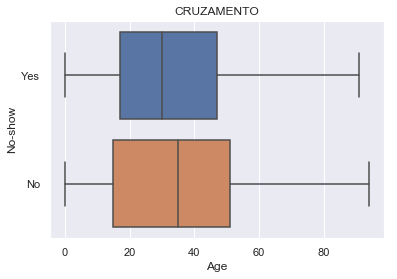

probability of no-show = yes Neighbourhood
DO MOSCOSO    0.22276
Name: ns_Yes_percent, dtype: float64


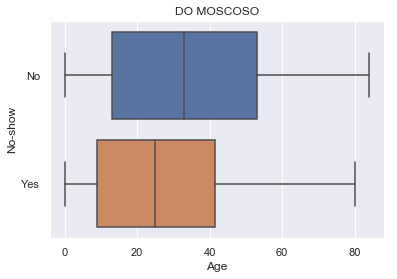

probability of no-show = yes Neighbourhood
ENSEADA DO SUÁ    0.221277
Name: ns_Yes_percent, dtype: float64


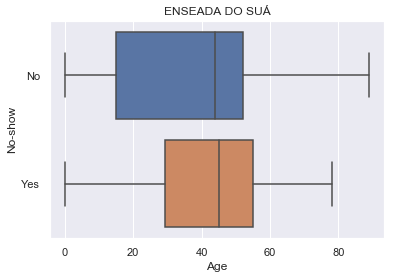

probability of no-show = yes Neighbourhood
FONTE GRANDE    0.218475
Name: ns_Yes_percent, dtype: float64


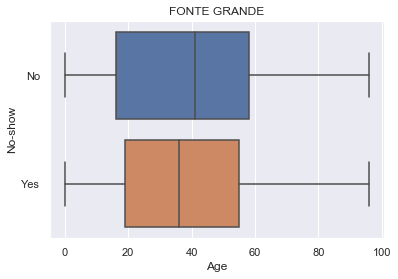

probability of no-show = yes Neighbourhood
GURIGICA    0.225966
Name: ns_Yes_percent, dtype: float64


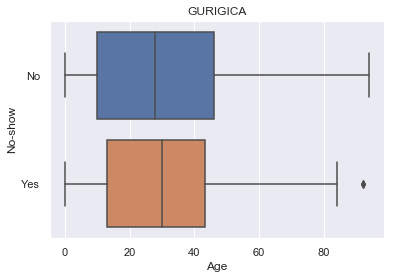

probability of no-show = yes Neighbourhood
HORTO    0.24
Name: ns_Yes_percent, dtype: float64


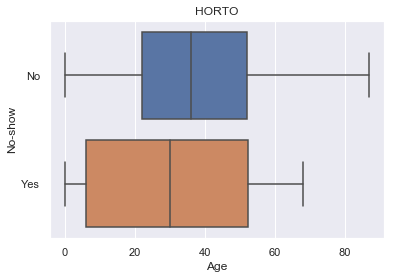

probability of no-show = yes Neighbourhood
ILHA DAS CAIEIRAS    0.219421
Name: ns_Yes_percent, dtype: float64


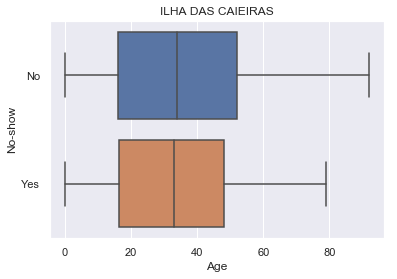

probability of no-show = yes Neighbourhood
ILHA DO PRÍNCIPE    0.234775
Name: ns_Yes_percent, dtype: float64


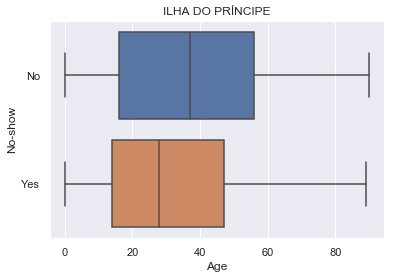

probability of no-show = yes Neighbourhood
ITARARÉ    0.262664
Name: ns_Yes_percent, dtype: float64


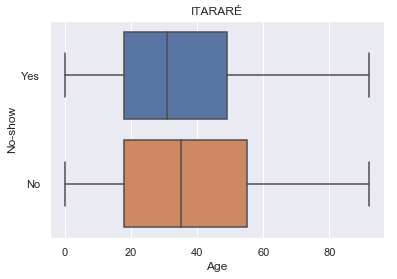

probability of no-show = yes Neighbourhood
JESUS DE NAZARETH    0.243954
Name: ns_Yes_percent, dtype: float64


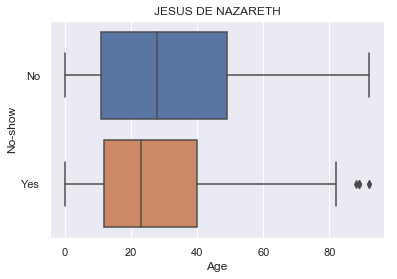

probability of no-show = yes Neighbourhood
MARUÍPE    0.222923
Name: ns_Yes_percent, dtype: float64


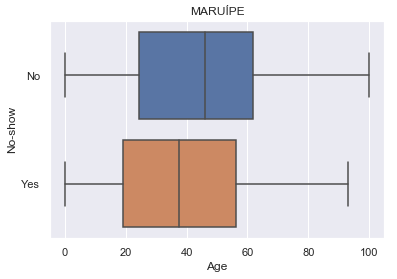

probability of no-show = yes Neighbourhood
NAZARETH    0.214815
Name: ns_Yes_percent, dtype: float64


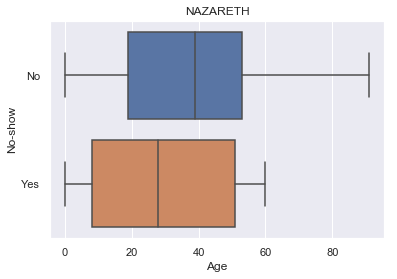

probability of no-show = yes Neighbourhood
PARQUE MOSCOSO    0.223192
Name: ns_Yes_percent, dtype: float64


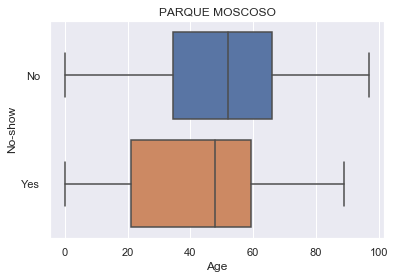

probability of no-show = yes Neighbourhood
PRAIA DO SUÁ    0.228261
Name: ns_Yes_percent, dtype: float64


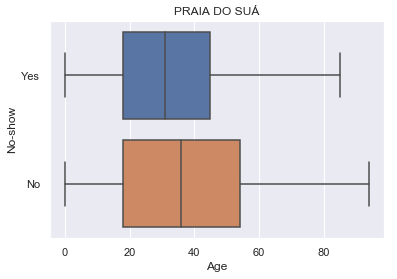

probability of no-show = yes Neighbourhood
ROMÃO    0.213995
Name: ns_Yes_percent, dtype: float64


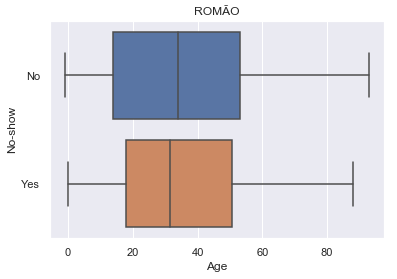

probability of no-show = yes Neighbourhood
SANTA CECÍLIA    0.274554
Name: ns_Yes_percent, dtype: float64


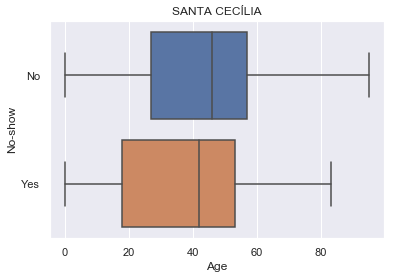

probability of no-show = yes Neighbourhood
SANTA CLARA    0.264822
Name: ns_Yes_percent, dtype: float64


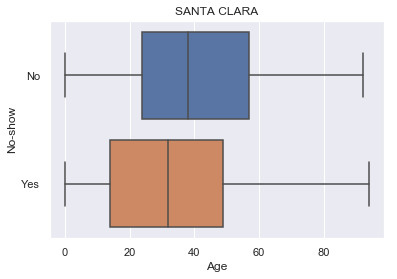

probability of no-show = yes Neighbourhood
SANTOS DUMONT    0.289185
Name: ns_Yes_percent, dtype: float64


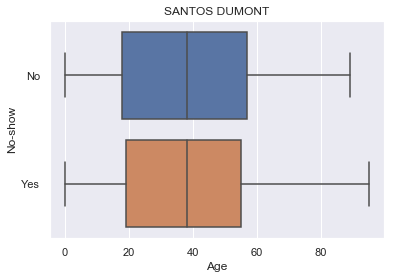

probability of no-show = yes Neighbourhood
SÃO JOSÉ    0.21649
Name: ns_Yes_percent, dtype: float64


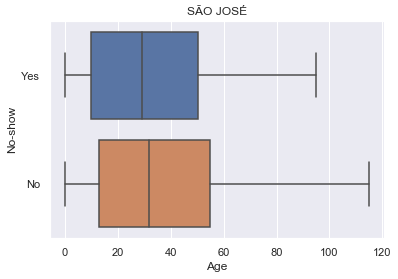

probability of no-show = yes Neighbourhood
SÃO PEDRO    0.210376
Name: ns_Yes_percent, dtype: float64


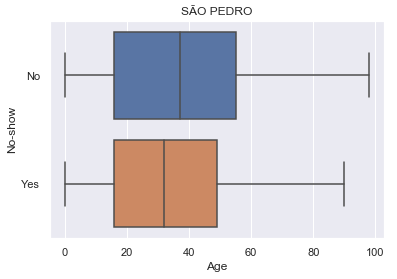

probability of no-show = yes Neighbourhood
UNIVERSITÁRIO    0.210526
Name: ns_Yes_percent, dtype: float64


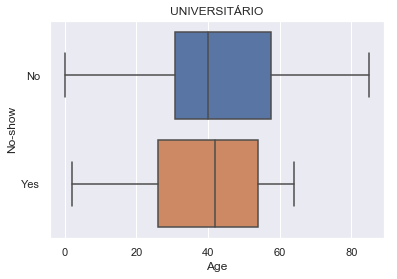

In [105]:
neig = list(k_fileterd.index)
for n in neig:
    print("probability of no-show = yes {}".format(k_fileterd.loc[k_fileterd.index == n, "ns_Yes_percent"]))
    g = sns.boxplot('Age','No-show', data=appointments.loc[appointments["Neighbourhood"]==n,])
    plt.title(n)
    plt.show()

The overall probability of no-show = yes is high in some neighbourhoods, hence we will create dummy corresponding to these neighbourhoods. We are using .24 as the cut-off

In [182]:
neighbourhood = k.index[k["ns_Yes_percent"] > 0.24]
neighbourhood

Index(['ITARARÉ', 'JESUS DE NAZARETH', 'SANTA CECÍLIA', 'SANTA CLARA',
       'SANTOS DUMONT'],
      dtype='object', name='Neighbourhood')

In [183]:
def create_dummy(data, column, label):
    new_column = "is_" + label
    data[new_column] = (data[column] == label).astype(int)

In [184]:
for n in neighbourhood:
    print(n)
    create_dummy(appointments, "Neighbourhood", n)

ITARARÉ
JESUS DE NAZARETH
SANTA CECÍLIA
SANTA CLARA
SANTOS DUMONT


In [185]:
appointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 39 columns):
PatientId                    110527 non-null float64
AppointmentID                110527 non-null int64
Gender                       110527 non-null object
ScheduledDay                 110527 non-null object
AppointmentDay               110527 non-null object
Age                          110527 non-null int64
Neighbourhood                110527 non-null object
Scholarship                  110527 non-null int64
Hipertension                 110527 non-null int64
Diabetes                     110527 non-null int64
Alcoholism                   110527 non-null int64
Handcap                      110527 non-null int64
SMS_received                 110527 non-null int64
No-show                      110527 non-null object
ScheduledDay_date            110527 non-null datetime64[ns]
AppointmentDay_date          110527 non-null datetime64[ns]
Scheduled_Day_of_week        110527 non-null obj

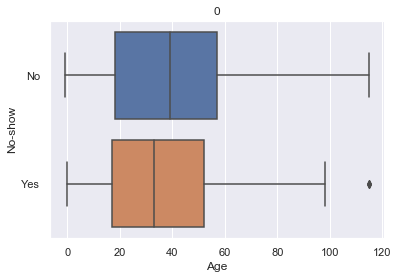

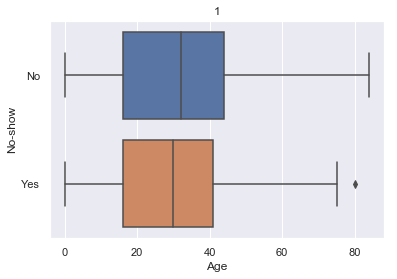

In [109]:
# plt.figure(figsize=(30, 30))
# %matplotlib inline
schol = list(appointments.Scholarship.unique())
for s in schol:
    g = sns.boxplot('Age', 'No-show',data=appointments.loc[appointments["Scholarship"]==s,])
    plt.title(s)
    plt.show()

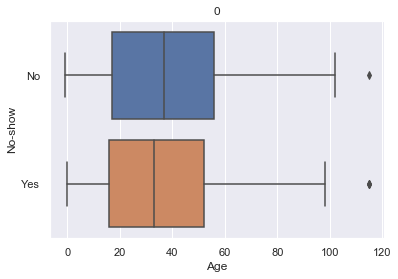

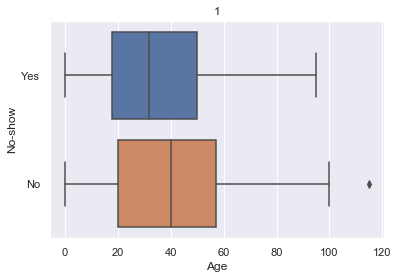

In [110]:
# plt.figure(figsize=(30, 30))
# %matplotlib inline
sms = list(appointments.SMS_received.unique())
for s in sms:
    g = sns.boxplot('Age', 'No-show',data=appointments.loc[appointments["SMS_received"]==s,])
    plt.title(s)
    plt.show()

Creating variable for previous no show for pateints

In [146]:
appointments['NoShow'] = (appointments['No-show'] == 'Yes')
appointments['PreviousApp'] = appointments.sort_values(by = ['PatientId','ScheduledDay']).groupby(['PatientId']).cumcount()
appointments['PreviousNoShow'] = (appointments[appointments['PreviousApp'] > 0].sort_values(['PatientId', 'ScheduledDay']).groupby(['PatientId'])['NoShow'].cumsum() / appointments[appointments['PreviousApp'] > 0]['PreviousApp'])


In [147]:
appointments.loc[:, 'MissedAppointments'] = appointments.sort_values(['ScheduledDay']).groupby(['PatientId'])['NoShow'].cumsum()

In [148]:
appointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 34 columns):
PatientId                    110527 non-null float64
AppointmentID                110527 non-null int64
Gender                       110527 non-null object
ScheduledDay                 110527 non-null object
AppointmentDay               110527 non-null object
Age                          110527 non-null int64
Neighbourhood                110527 non-null object
Scholarship                  110527 non-null int64
Hipertension                 110527 non-null int64
Diabetes                     110527 non-null int64
Alcoholism                   110527 non-null int64
Handcap                      110527 non-null int64
SMS_received                 110527 non-null int64
No-show                      110527 non-null object
ScheduledDay_date            110527 non-null datetime64[ns]
AppointmentDay_date          110527 non-null datetime64[ns]
Scheduled_Day_of_week        110527 non-null obj

In [149]:
appointments.describe(include='all')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,Appointment_Day_of_month,Appointment_year,WeekdayScheduled,WeekdayAppointment,DaysBeforeApp,DaysBeforeAppCat,NoShow,PreviousApp,PreviousNoShow,MissedAppointments
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,...,110527,110527,110527.000000,110527.000000,110527.000000,110527,110527,110527.000000,48228.000000,110527.000000
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,...,24,1,NaN,NaN,NaN,7,2,NaN,NaN,NaN
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,...,02,2016,NaN,NaN,NaN,> 45 days,False,NaN,NaN,NaN
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,...,8686,110527,NaN,NaN,NaN,42320,88208,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,...,NaN,NaN,2.851955,2.858243,9.183702,NaN,NaN,1.270314,0.199614,0.432039
std,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,...,NaN,NaN,1.378520,1.371672,15.254996,NaN,NaN,3.913419,0.342456,0.816249
min,3.921784e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,...,NaN,NaN,1.000000,1.000000,-7.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,...,NaN,NaN,2.000000,2.000000,-1.000000,NaN,NaN,0.000000,0.000000,0.000000


In [150]:
appointments.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,Appointment_Day_of_month,Appointment_year,WeekdayScheduled,WeekdayAppointment,DaysBeforeApp,DaysBeforeAppCat,NoShow,PreviousApp,PreviousNoShow,MissedAppointments
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,...,29,2016,5,5,-1,> 45 days,False,1,0.0,0.0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,...,29,2016,5,5,-1,> 45 days,False,1,0.0,0.0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,...,29,2016,5,5,-1,> 45 days,False,1,0.0,0.0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,...,29,2016,5,5,-1,> 45 days,False,1,0.0,1.0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,...,29,2016,5,5,-1,> 45 days,False,0,NaN,0.0


In [153]:
appointments.sort_values(by = ['MissedAppointments'], ascending=False)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,Appointment_Day_of_month,Appointment_year,WeekdayScheduled,WeekdayAppointment,DaysBeforeApp,DaysBeforeAppCat,NoShow,PreviousApp,PreviousNoShow,MissedAppointments
90532,1.421987e+12,5786151,M,2016-06-08T08:03:30Z,2016-06-08T00:00:00Z,9,SÃO BENEDITO,0,0,0,...,08,2016,3,3,-1,> 45 days,True,17,1.000000,18.0
95294,1.421987e+12,5785809,M,2016-06-08T07:41:10Z,2016-06-08T00:00:00Z,9,SÃO BENEDITO,0,0,0,...,08,2016,3,3,-1,> 45 days,True,16,1.000000,17.0
95346,1.421987e+12,5785684,M,2016-06-08T07:32:52Z,2016-06-08T00:00:00Z,9,SÃO BENEDITO,0,0,0,...,08,2016,3,3,-1,> 45 days,True,15,1.000000,16.0
90538,5.635135e+14,5786157,M,2016-06-08T08:03:30Z,2016-06-08T00:00:00Z,9,SÃO JOSÉ,1,0,0,...,08,2016,3,3,-1,> 45 days,True,15,1.000000,16.0
95298,1.421987e+12,5761188,M,2016-06-01T16:38:28Z,2016-06-01T00:00:00Z,9,SÃO BENEDITO,0,0,0,...,01,2016,3,3,-1,> 45 days,True,14,1.000000,15.0
95293,5.635135e+14,5785810,M,2016-06-08T07:41:10Z,2016-06-08T00:00:00Z,9,SÃO JOSÉ,1,0,0,...,08,2016,3,3,-1,> 45 days,True,14,1.000000,15.0
94664,5.587790e+12,5769412,M,2016-06-03T08:48:24Z,2016-06-03T00:00:00Z,14,SANTA TEREZA,0,0,0,...,03,2016,5,5,-1,> 45 days,True,19,0.736842,15.0
95345,5.635135e+14,5785685,M,2016-06-08T07:32:52Z,2016-06-08T00:00:00Z,9,SÃO JOSÉ,1,0,0,...,08,2016,3,3,-1,> 45 days,True,13,1.000000,14.0
95289,5.587790e+12,5761190,M,2016-06-01T16:38:28Z,2016-06-01T00:00:00Z,14,SANTA TEREZA,0,0,0,...,01,2016,3,3,-1,> 45 days,True,18,0.722222,14.0
90519,1.421987e+12,5758281,M,2016-06-01T10:32:44Z,2016-06-01T00:00:00Z,9,SÃO BENEDITO,0,0,0,...,01,2016,3,3,-1,> 45 days,True,13,1.000000,14.0


In [159]:
appointments['MissedAppointments'].value_counts()

0.0     75354
1.0     27313
2.0      5415
3.0      1472
4.0       486
5.0       210
6.0       108
7.0        49
8.0        34
9.0        27
10.0       19
11.0       18
12.0        6
13.0        5
14.0        4
15.0        3
16.0        2
17.0        1
18.0        1
Name: MissedAppointments, dtype: int64

In [162]:
df = appointments.groupby(['MissedAppointments']).size().reset_index()
df.columns = ['MissedAppointments',  "count"]
df["proportion"] = df['count'] / appointments.shape[0]
df

,MissedAppointments,count,proportion
0,0.0,75354,0.681770
1,1.0,27313,0.247116
2,2.0,5415,0.048993
3,3.0,1472,0.013318
4,4.0,486,0.004397
5,5.0,210,0.001900
6,6.0,108,0.000977
7,7.0,49,0.000443
8,8.0,34,0.000308
9,9.0,27,0.000244


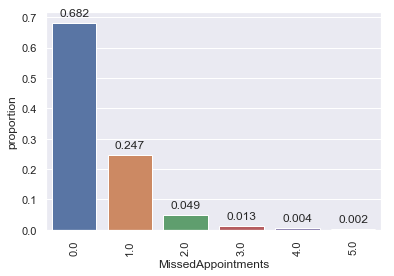

In [171]:
g = sns.barplot(x='MissedAppointments',y='proportion', data=df[df['proportion'] > 0.001])
for p in g.patches:
    g.annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

_, label = plt.xticks()
g.set_xticklabels(label, rotation=90)
#     plt.xlabel(c)
plt.show()

Saving the modified data to be used for modeling

In [186]:
appointments.to_csv('D:/DataIncubator_ChestXray/appointment_show_no-show/appointments_withFeatures.csv', index=False)